In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



# Load the dataset
file_path = '/content/level3grades - Students_Grading_Dataset.csv'  # Update with your path
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           206 non-null    object 
 1   First_Name           206 non-null    object 
 2   Last_Name            206 non-null    object 
 3   Email                206 non-null    object 
 4   Gender               206 non-null    object 
 5   Age                  206 non-null    int64  
 6   Department           206 non-null    object 
 7   Attendance (%)       206 non-null    float64
 8   Midterm_Score        206 non-null    float64
 9   Final_Score          206 non-null    float64
 10  Assignments_Avg      206 non-null    float64
 11  Quizzes_Avg          206 non-null    float64
 12  Participation_Score  206 non-null    float64
 13  Projects_Score       206 non-null    float64
 14  Total_Score          206 non-null    float64
 15  Grade                206 non-null    obj

Step 2: Defining the Academic Achievement KPI
We'll define our KPI as the "Total_Score" from the dataset, which appears to be a comprehensive measure of student performance.

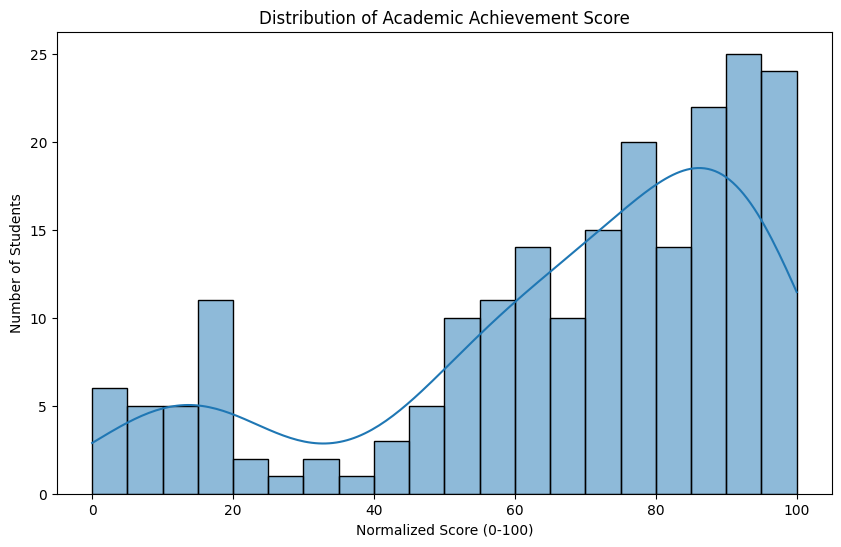

In [3]:
# Define KPI - Total Score
kpi_name = "Academic Achievement Score"
kpi_df = df[['Student_ID', 'First_Name', 'Last_Name', 'Department', 'Total_Score', 'Grade']].copy()

# Add a normalized version (0-100 scale)
kpi_df['Normalized_Score'] = (kpi_df['Total_Score'] - kpi_df['Total_Score'].min()) / \
                            (kpi_df['Total_Score'].max() - kpi_df['Total_Score'].min()) * 100

# Display KPI distribution
plt.figure(figsize=(10, 6))
sns.histplot(kpi_df['Normalized_Score'], bins=20, kde=True)
plt.title(f'Distribution of {kpi_name}')
plt.xlabel('Normalized Score (0-100)')
plt.ylabel('Number of Students')
plt.show()

Step 3: Building the AI Model for Target Prediction
We'll build a model to predict what a student's target score should be based on their other performance metrics.

Model Performance:
Mean Squared Error: 85.17
R-squared: 0.78


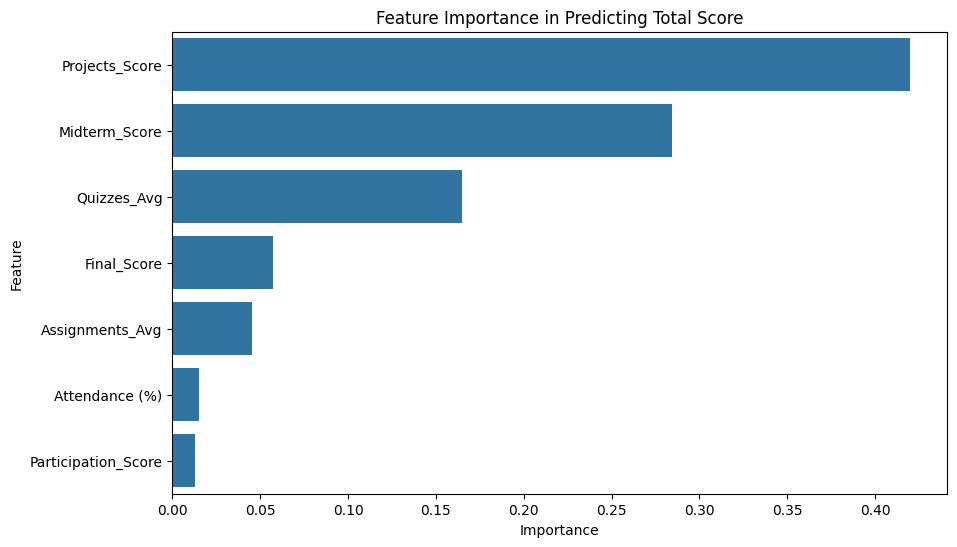

In [4]:
# Prepare data for modeling
features = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg',
            'Quizzes_Avg', 'Participation_Score', 'Projects_Score']
target = 'Total_Score'

# Clean data (remove any missing values if they exist)
model_df = df[features + [target]].dropna()

# Split data
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Total Score')
plt.show()

Step 4: Gap Analysis and Action Planning
Now we'll analyze the gap between actual and predicted scores and suggest action plans.

  Student_ID First_Name Last_Name               Department  Total_Score  \
0      S1000      Esraa      Nour  Artificial Intelligence        83.49   
1      S1001      Maria     Brown  Artificial Intelligence        92.29   
2      S1002      Ahmed     Jones  Artificial Intelligence        93.55   
3      S1003       Omar  Williams  Artificial Intelligence        71.03   
4      S1004       John     Smith  Artificial Intelligence        90.91   
5      S1005       Liam     Brown  Artificial Intelligence        92.66   
6      S1006       Adel     Jones  Artificial Intelligence        89.78   
7      S1007      Ahmed     Smith  Artificial Intelligence        94.00   
8      S1008       Omar     Smith  Artificial Intelligence        55.55   
9      S1009       Sara     Smith  Artificial Intelligence        91.98   

   Predicted_Score  Score_Gap    Performance_Category  \
0          78.6530    -4.8370    Meeting Expectations   
1          88.8660    -3.4240    Meeting Expectations   
2  

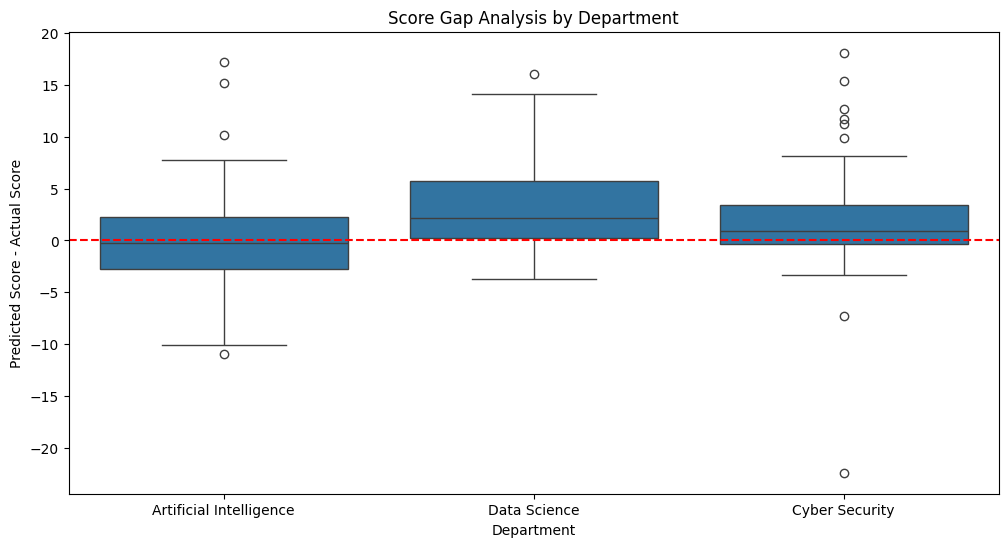

In [5]:
# Predict target scores for all students
df['Predicted_Score'] = model.predict(df[features])

# Calculate gap
df['Score_Gap'] = df['Predicted_Score'] - df['Total_Score']

# Categorize students based on performance
def performance_category(row):
    if row['Score_Gap'] < -5:
        return 'Exceeding Expectations'
    elif -5 <= row['Score_Gap'] <= 5:
        return 'Meeting Expectations'
    else:
        return 'Needs Improvement'

df['Performance_Category'] = df.apply(performance_category, axis=1)

# Action plan suggestions
def suggest_action(category, department):
    if category == 'Exceeding Expectations':
        return "Consider advanced coursework or research opportunities"
    elif category == 'Meeting Expectations':
        return "Maintain current study habits with minor optimizations"
    else:
        if department == 'Artificial Intelligence':
            return "Focus on improving quiz scores and project work"
        elif department == 'Data Science':
            return "Work on assignments and midterm preparation"
        elif department == 'Cyber Security':
            return "Increase participation and focus on final exams"
        else:
            return "General study skills improvement needed"

df['Action_Plan'] = df.apply(lambda x: suggest_action(x['Performance_Category'], x['Department']), axis=1)

# Display gap analysis results
gap_analysis = df[['Student_ID', 'First_Name', 'Last_Name', 'Department',
                  'Total_Score', 'Predicted_Score', 'Score_Gap',
                  'Performance_Category', 'Action_Plan']]

print(gap_analysis.head(10))

# Visualize gaps by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Score_Gap', data=df)
plt.title('Score Gap Analysis by Department')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Predicted Score - Actual Score')
plt.show()

Step 5: KPI Measurement and Tracking
Create a system to track KPIs over time and measure progress.

In [6]:
# Create a KPI tracking function
def track_kpi(student_id, window=3):
    student_data = df[df['Student_ID'] == student_id]
    if len(student_data) == 0:
        return "Student not found"

    # Calculate moving average (simulated - in real scenario would have temporal data)
    scores = [student_data['Total_Score'].values[0]] * window
    moving_avg = np.mean(scores)

    # Determine trend
    trend = "Stable"
    if student_data['Score_Gap'].values[0] > 5:
        trend = "Downward"
    elif student_data['Score_Gap'].values[0] < -5:
        trend = "Upward"

    return {
        'Student_ID': student_id,
        'Current_Score': student_data['Total_Score'].values[0],
        'Target_Score': student_data['Predicted_Score'].values[0],
        'Gap': student_data['Score_Gap'].values[0],
        'Trend': trend,
        'Moving_Average': moving_avg,
        'Action_Plan': student_data['Action_Plan'].values[0]
    }

# Example usage
print(track_kpi('S1000'))

# Department-level KPI tracking
dept_kpi = df.groupby('Department').agg({
    'Total_Score': ['mean', 'median', 'std'],
    'Score_Gap': 'mean'
}).reset_index()

dept_kpi.columns = ['Department', 'Avg_Score', 'Median_Score', 'Score_Std', 'Avg_Gap']

print("\nDepartment-level KPI:")
print(dept_kpi)

{'Student_ID': 'S1000', 'Current_Score': np.float64(83.49), 'Target_Score': np.float64(78.6529999999999), 'Gap': np.float64(-4.837000000000089), 'Trend': 'Stable', 'Moving_Average': np.float64(83.49), 'Action_Plan': 'Maintain current study habits with minor optimizations'}

Department-level KPI:
                Department  Avg_Score  Median_Score  Score_Std   Avg_Gap
0  Artificial Intelligence  76.839007        82.630  20.427290 -0.302774
1           Cyber Security  65.673061        67.700  24.978864  1.955073
2             Data Science  68.321250        72.405  24.500128  3.493213


Step 6: Timetable Generation for KPI Measurement
Generate a timetable for regular KPI measurement and student check-ins.

In [7]:
from datetime import datetime, timedelta

def generate_timetable(student_id, start_date, weeks=12):
    base_date = datetime.strptime(start_date, '%Y-%m-%d')
    timetable = []

    for week in range(weeks):
        check_date = base_date + timedelta(weeks=week)

        # Every 2 weeks for students needing improvement, every 4 for others
        student_data = df[df['Student_ID'] == student_id]
        if len(student_data) == 0:
            continue

        category = student_data['Performance_Category'].values[0]

        if category == 'Needs Improvement' and week % 2 == 0:
            timetable.append({
                'Week': week+1,
                'Date': check_date.strftime('%Y-%m-%d'),
                'Activity': 'Progress Review',
                'Focus_Area': student_data['Action_Plan'].values[0]
            })
        elif week % 4 == 0:
            timetable.append({
                'Week': week+1,
                'Date': check_date.strftime('%Y-%m-%d'),
                'Activity': 'Progress Review',
                'Focus_Area': student_data['Action_Plan'].values[0]
            })

        # Add midterm/final exam prep if applicable
        if week in [3, 9]:  # Assuming weeks 4 and 10 are exam weeks
            timetable.append({
                'Week': week+1,
                'Date': check_date.strftime('%Y-%m-%d'),
                'Activity': 'Exam Preparation',
                'Focus_Area': 'Review key concepts and practice problems'
            })

    return pd.DataFrame(timetable)

# Example timetable
print(generate_timetable('S1000', '2023-09-01'))
print(generate_timetable('S1008', '2023-09-01'))  # Student needing improvement

   Week        Date          Activity  \
0     1  2023-09-01   Progress Review   
1     4  2023-09-22  Exam Preparation   
2     5  2023-09-29   Progress Review   
3     9  2023-10-27   Progress Review   
4    10  2023-11-03  Exam Preparation   

                                          Focus_Area  
0  Maintain current study habits with minor optim...  
1          Review key concepts and practice problems  
2  Maintain current study habits with minor optim...  
3  Maintain current study habits with minor optim...  
4          Review key concepts and practice problems  
   Week        Date          Activity  \
0     1  2023-09-01   Progress Review   
1     4  2023-09-22  Exam Preparation   
2     5  2023-09-29   Progress Review   
3     9  2023-10-27   Progress Review   
4    10  2023-11-03  Exam Preparation   

                                          Focus_Area  
0  Consider advanced coursework or research oppor...  
1          Review key concepts and practice problems  
2  Consider

Step 7: Comprehensive Reporting
Create a comprehensive report for a student's academic performance.

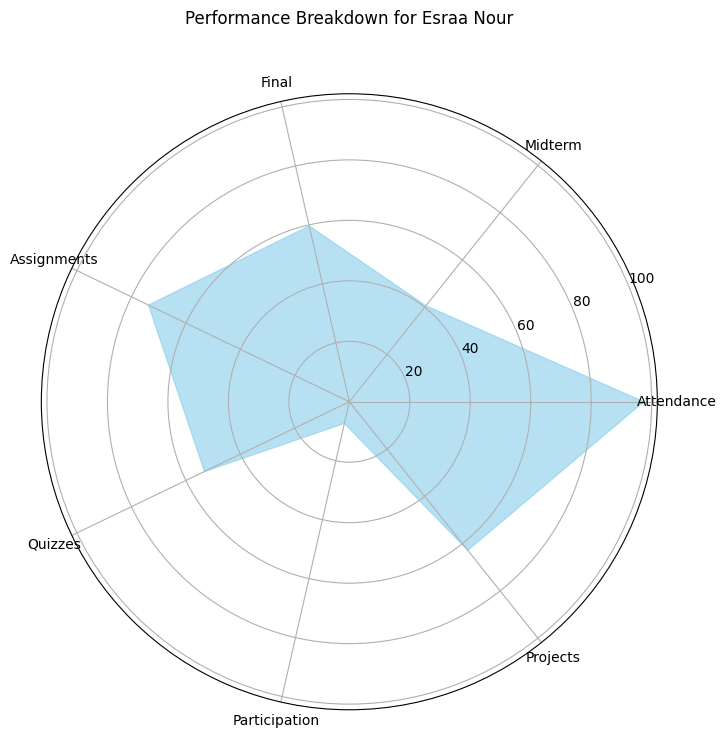


    STUDENT ACADEMIC PERFORMANCE REPORT
    ----------------------------------
    Student ID: S1000
    Name: Esraa Nour
    Department: Artificial Intelligence
    Current Grade: B
    
    PERFORMANCE METRICS:
    - Total Score: 83.49 (Predicted: 78.65)
    - Score Gap: -4.84
    - Performance Category: Meeting Expectations
    
    STRENGTHS:
    - Highest scoring area: Attendance (97.36)
    
    AREAS FOR IMPROVEMENT:
    - Lowest scoring area: Participation (7.34)
    
    RECOMMENDED ACTION PLAN:
    Maintain current study habits with minor optimizations
    
    NEXT STEPS:
    - Implement suggested action plan
    - Schedule regular progress reviews
    - Focus on improving Participation performance
    


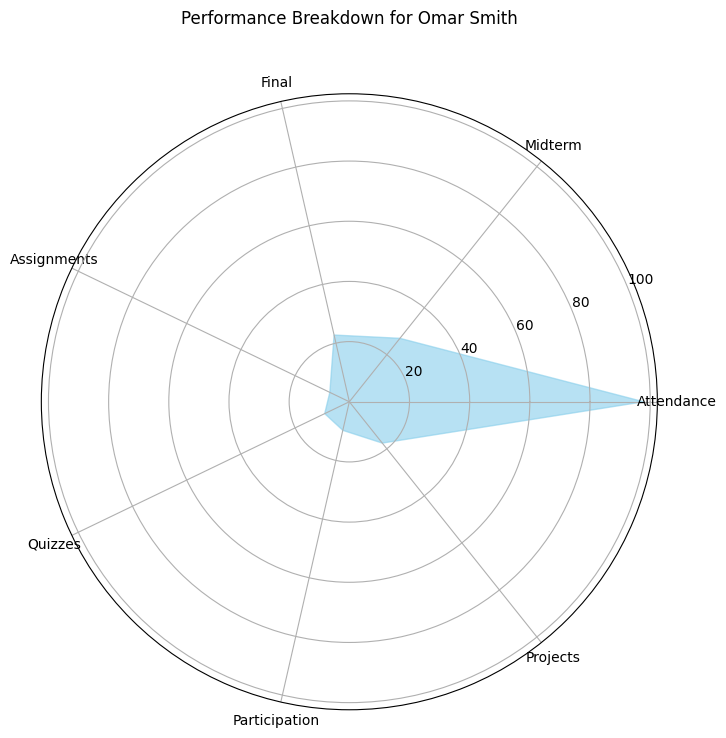


    STUDENT ACADEMIC PERFORMANCE REPORT
    ----------------------------------
    Student ID: S1008
    Name: Omar Smith
    Department: Artificial Intelligence
    Current Grade: D
    
    PERFORMANCE METRICS:
    - Total Score: 55.55 (Predicted: 48.38)
    - Score Gap: -7.17
    - Performance Category: Exceeding Expectations
    
    STRENGTHS:
    - Highest scoring area: Attendance (97.83)
    
    AREAS FOR IMPROVEMENT:
    - Lowest scoring area: Assignments (7.19)
    
    RECOMMENDED ACTION PLAN:
    Consider advanced coursework or research opportunities
    
    NEXT STEPS:
    - Implement suggested action plan
    - Schedule regular progress reviews
    - Focus on improving Assignments performance
    


In [8]:
def generate_student_report(student_id):
    student_data = df[df['Student_ID'] == student_id]
    if len(student_data) == 0:
        return "Student not found"

    student_data = student_data.iloc[0]

    # Create radar chart for performance breakdown
    categories = ['Attendance', 'Midterm', 'Final', 'Assignments', 'Quizzes', 'Participation', 'Projects']
    values = [
        student_data['Attendance (%)'],
        student_data['Midterm_Score'],
        student_data['Final_Score'],
        student_data['Assignments_Avg'],
        student_data['Quizzes_Avg'],
        student_data['Participation_Score'],
        student_data['Projects_Score']
    ]

    # Normalize values to 0-100 scale for radar chart
    normalized_values = [v / max(df[col].max() for col in features) * 100 for v, col in zip(values, features)]

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    normalized_values += normalized_values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, normalized_values, color='skyblue', alpha=0.6)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Performance Breakdown for {student_data["First_Name"]} {student_data["Last_Name"]}', y=1.1)
    plt.show()

    # Print report
    report = f"""
    STUDENT ACADEMIC PERFORMANCE REPORT
    ----------------------------------
    Student ID: {student_id}
    Name: {student_data['First_Name']} {student_data['Last_Name']}
    Department: {student_data['Department']}
    Current Grade: {student_data['Grade']}

    PERFORMANCE METRICS:
    - Total Score: {student_data['Total_Score']:.2f} (Predicted: {student_data['Predicted_Score']:.2f})
    - Score Gap: {student_data['Score_Gap']:.2f}
    - Performance Category: {student_data['Performance_Category']}

    STRENGTHS:
    - Highest scoring area: {categories[np.argmax(values)]} ({max(values):.2f})

    AREAS FOR IMPROVEMENT:
    - Lowest scoring area: {categories[np.argmin(values)]} ({min(values):.2f})

    RECOMMENDED ACTION PLAN:
    {student_data['Action_Plan']}

    NEXT STEPS:
    - Implement suggested action plan
    - Schedule regular progress reviews
    - Focus on improving {categories[np.argmin(values)]} performance
    """

    print(report)

# Example report
generate_student_report('S1000')
generate_student_report('S1008')

In [9]:
# 1. Model persistence (save and load the trained model)
import joblib

# Save model
joblib.dump(model, 'academic_performance_model.pkl')

# Later, load the model
# loaded_model = joblib.load('academic_performance_model.pkl')

# 2. Create a simple interactive interface
def interactive_report():
    student_id = input("Enter Student ID (e.g., S1000): ")
    report = generate_student_report(student_id)
    return report

# 3. Batch processing for all students
def generate_all_reports():
    reports = []
    for student_id in df['Student_ID'].unique():
        report = generate_student_report(student_id)
        reports.append(report)
    return reports

# 4. Export results to CSV for further analysis
gap_analysis.to_csv('student_gap_analysis.csv', index=False)
dept_kpi.to_csv('department_kpis.csv', index=False)